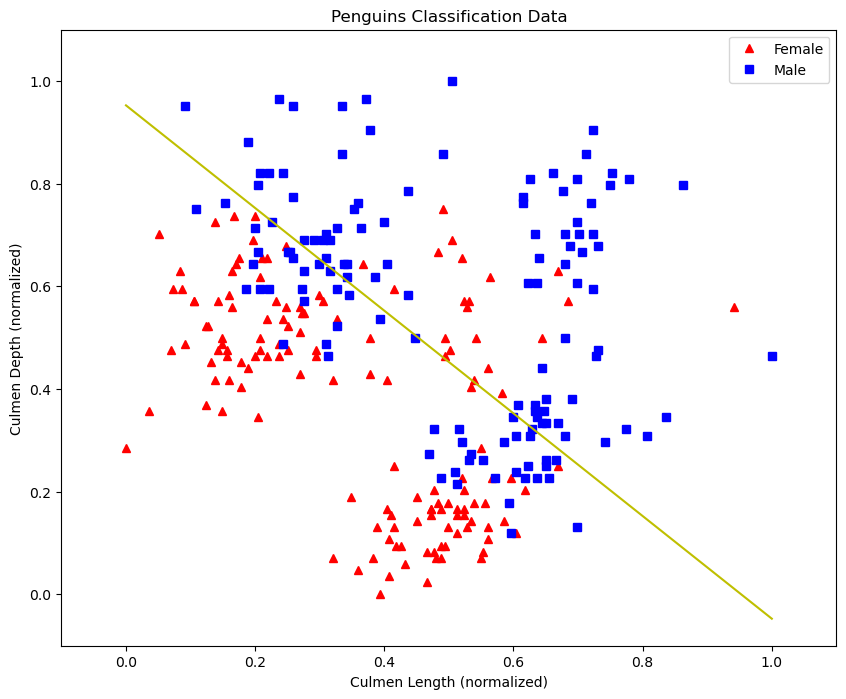

Accuracy: 63.77%


In [2]:
# PERCEPTRON WITH ALGORITHM

# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

def perceptron(X, y, learning_rate, epochs):
    # Add a bias term to X
    X = np.c_[np.ones(X.shape[0]), X]
    
    # Initialize weights to zeros
    theta = np.zeros(X.shape[1])

    # Placeholder for misclassifications and loss
    miss_list = []
    loss_list = []

    for epoch in range(epochs):
        miss_count = 0
        for i in range(X.shape[0]):
            if y[i] * np.dot(theta, X[i, :]) <= 0:
                theta += learning_rate * y[i] * X[i, :]
                miss_count += 1
        
        # Calculate the loss (misclassification ratio)
        loss = miss_count / X.shape[0]
        miss_list.append(miss_count)
        loss_list.append(loss)

    return theta, miss_list, loss_list

# Load the penguins dataset
dd = pd.read_csv(r"C:\Users\tuhin\Downloads\penguins_size.csv")
dd['target'] = np.where(dd['sex'] == 'MALE', 1, -1)
X = dd[['culmen_length_mm', 'culmen_depth_mm']].values
y = dd['target'].values
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# The  plot_decision_boundary function
def plot_decision_boundary(X, y, theta):
    x1 = np.array([min(X[:, 0]), max(X[:, 0])])
    x2 = -(theta[0] + theta[1] * x1) / theta[1]

    fig = plt.figure(figsize=(10, 8))

    # Filter data based on non-missing indices
    not_missing_indices = ~np.isnan(X).any(axis=1)

    plt.plot(X[not_missing_indices, 0][y[not_missing_indices] == -1], X[not_missing_indices, 1][y[not_missing_indices] == -1], "r^", label='Female')
    plt.plot(X[not_missing_indices, 0][y[not_missing_indices] == 1], X[not_missing_indices, 1][y[not_missing_indices] == 1], "bs", label='Male')

    plt.xlabel("Culmen Length (normalized)")
    plt.ylabel("Culmen Depth (normalized)")
    plt.title('Penguins Classification Data')
    plt.plot(x1, x2, 'y-')
    plt.xlim(-0.1, 1.1)
    plt.ylim(-0.1, 1.1)
    plt.legend()

# Perceptron training
theta, miss_list, loss_list = perceptron(X_train, y_train, learning_rate=0.2, epochs=10)

# Plotting the decision boundary
plot_decision_boundary(X_train, y_train, theta)
plt.show()

def predict(X, theta):
    # Add a bias term to X
    X_bias = np.c_[np.ones(X.shape[0]), X]
    
    # Ensure the correct dimensions of theta
    if len(theta) != X_bias.shape[1]:
        raise ValueError(f"Invalid dimensions of theta. Expected {X_bias.shape[1]} elements, got {len(theta)}.")

    # Calculate predictions using the perceptron model
    predictions = np.sign(np.dot(X_bias, theta))
    
    return predictions

# Use the trained perceptron to make predictions on the test set
y_pred = predict(X_test, theta)
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")